## Example

This jupyter notebook intends to provide an example on how to use the ``tovpy``. 

The following cell shows an example of how to use the ``eos.py`` to convert between pseudoenthalpy, pressure and energy density.

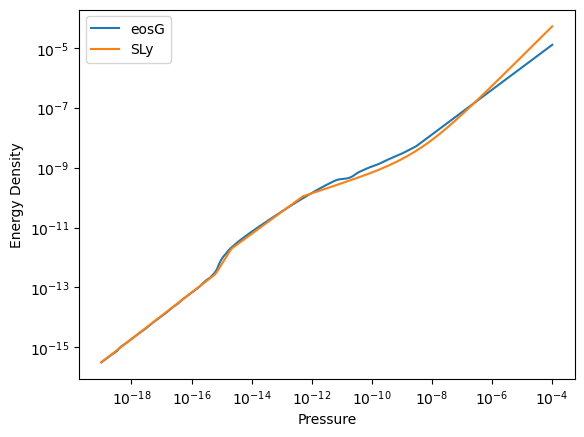

In [1]:
from tovpy.eos import *
from tovpy.units import Units
uts = Units()
from scipy.constants import c, G
EoS = EOS('tabular',name="from_file",filename='eosG')
eos=EOSPiecewisePolytropic('SLy')#('piecewise_poly_1',gamma=5/3,K=6.560909879175998e+21)
from matplotlib import pyplot as plt
import numpy as np
pc = np.logspace(-19, -4, 200)
ec = np.array([EoS.EnergyDensity_Of_Pressure(pc[i]) for i in range(len(pc))])
ec2 = np.array([eos.EnergyDensity_Of_Pressure(pc[i]) for i in range(len(pc))])
plt.loglog(pc,ec,label='eosG')
plt.loglog(pc,ec2,label='SLy')
plt.legend()
plt.xlabel('Pressure')
plt.ylabel('Energy Density')
plt.show()

This cell shows a quick example of the use of ``tov.py`` to solve the TOV equations along with the calculation of Love numbers.

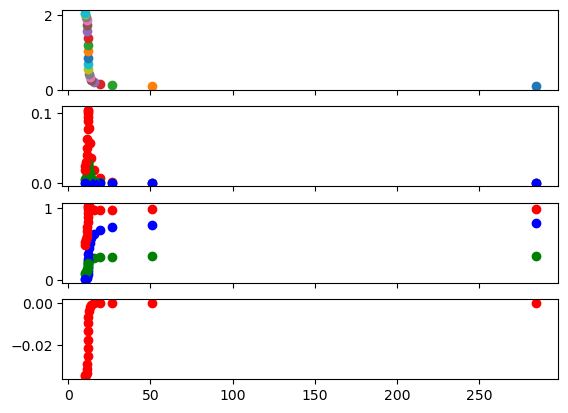

In [2]:
from tovpy.tov import TOV
this_tov = TOV(eos = eos,  leven = [2,3, 10], 
                                     lodd = [2], 
                                     #ode_method='RK45',
                                     ode_atol=1e-10, 
                                     ode_rtol=1e-10, 
                                     dhfact=-1e-12
                                 )

fig, ax = plt.subplots(4, sharex=True)
for i, pc in enumerate(np.logspace(-12, -9, 20)):

    M,R,C,k,h,j = this_tov.solve(pc)
    R *= 1./1e3
    M *= 1./uts.constant['MRSUN_SI'][0]    
    ax[0].scatter(R, M)
    ax[1].scatter(R, k[2], color='red')
    ax[1].scatter(R, k[3], color='green')
    ax[1].scatter(R, k[10], color='blue')
    ax[2].scatter(R, h[2], color='red')
    ax[2].scatter(R, h[3], color='green')
    ax[2].scatter(R, h[10], color='blue')
    ax[3].scatter(R, j[2], color='red')
plt.show()

In [3]:
central_pressure = 1e-10
result = this_tov.solve(central_pressure)
sol = this_tov.sol
baryon_mass = this_tov.Compute_baryon_mass(sol)/G*c**2/2e30
proper_radius = this_tov.Compute_proper_radius(sol)/1e3

print("Baryon mass:", baryon_mass)
print("Proper radius:", proper_radius)

Baryon mass: 1.536366577781717
Proper radius: 1.3160105426736337


Here is to show how to use ``utils.py`` to quickly visualise the data and to save the data in ``.txt`` files. Note that ``utils.py`` cannot provide the perfect plots with full flexibility, to customise your own plot, please use the exorted ``.txt`` data.

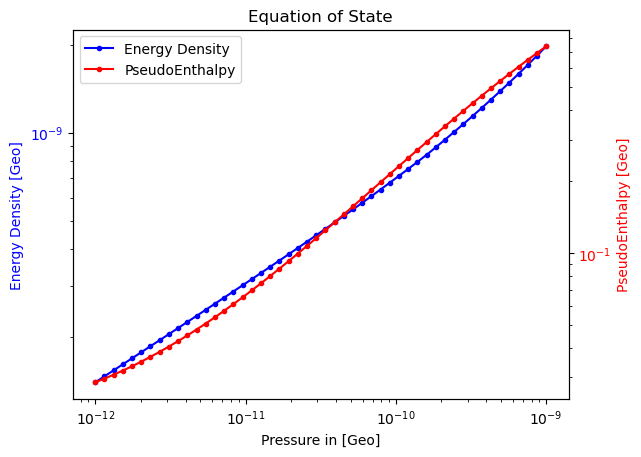

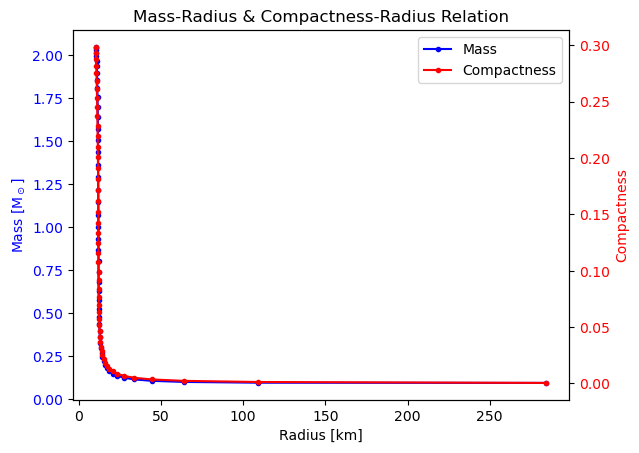

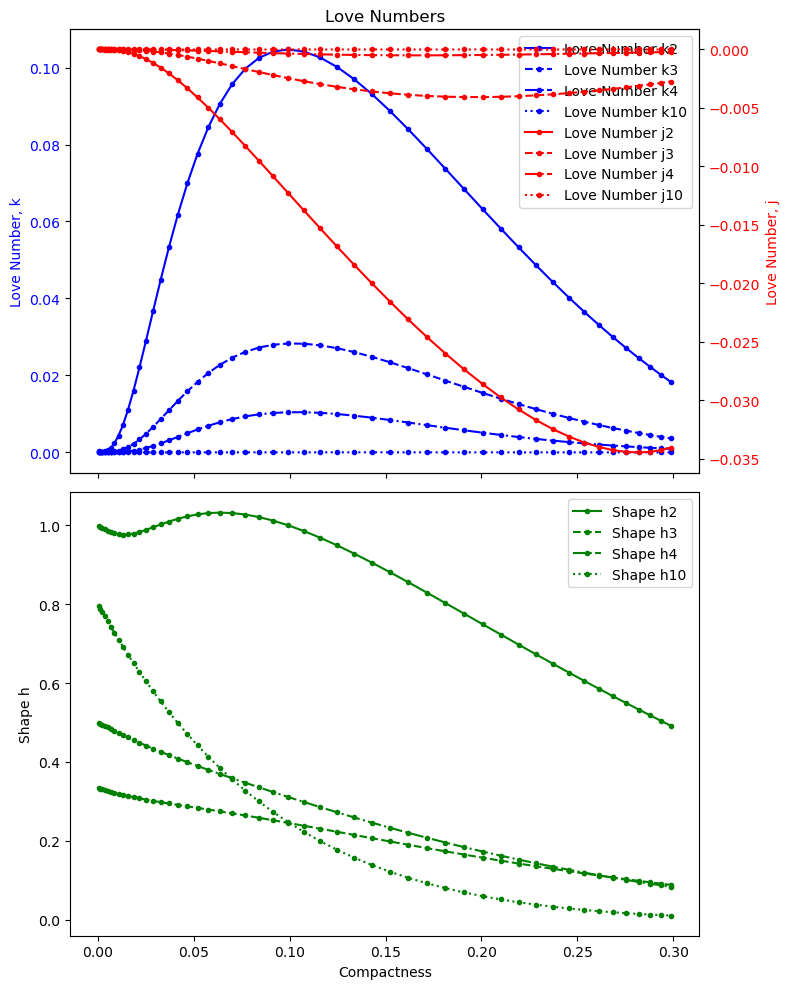

In [6]:
# In your Jupyter Notebook

# Import necessary packages and modules
import numpy as np
import matplotlib.pyplot as plt
import os

# Import the EOS and Units classes (assuming these are defined in the tovpy package)
from tovpy.eos import EOS
from tovpy.units import Units

# Import the Utils class from your utils module
from tovpy.utils import Utils

# Initialize the Units object (if needed)
uts = Units()

# Create an EOS instance.
# Note: Adjust the parameters for EOS() based on your actual implementation.
# eos = EOS('tabular',name="from_file",filename='eosG')  # for example, EOS(polytropic_index=...) if required

# Define an array of central pressures (example values, adjust as needed)
# Here we create 50 logarithmically spaced pressure values
p = np.logspace(-12, -9, 50)

# Specify a path where you want to save the output data/plots
save_path = "results"

# Create an instance of the Utils class using your EOS and pressure array
utils_instance = Utils(eos=eos, p=p, path=save_path)

# Now you can call the various methods:

# 1. Plot the Equation of State (EOS)
utils_instance.eos_plot(savefigon=True)
# This will display the EOS plot and also save it (using a default filename)


# 2. Save EOS data to a text file
utils_instance.eos_txt()
# The data will be saved to a file (e.g., "<EOS>eos_data.txt") in your results directory

# 3. Plot the Mass-Radius (MR) relation
utils_instance.MR_plot(savefigon=True)
# This displays and saves the mass-radius plot

# 4. Save the Mass-Radius data to a text file
utils_instance.MR_txt()

# 5. For plotting the Love numbers and moments of inertia, you need to provide
#    the "leven" and "lodd" parameters. Here are example arrays:
leven = [2, 3, 4, 10]  # even-parity multipoles (example values)
lodd  = [2, 3, 4, 10]  # odd-parity multipoles (example values)

# Plot the Love number and moment of inertia relation
utils_instance.Love_plot(leven=leven, lodd=lodd)

# Save the Love data to a text file
utils_instance.Love_txt(leven=leven, lodd=lodd)

